# Corso di Probabilità e Statistica- Network di correlazione

Questa capitolo spiega come disegnare una rete di correlazione: una rete costruita su una matrice di correlazione.

### Esempio 
Supponiamo di avere 10 persone e di sapere quanto sono vicine tra loro. È possibile rappresentare queste relazioni in una rete. Ogni individuo sarà un nodo. Se 2 individui sono abbastanza vicini (fissiamo una soglia), allora sono collegati da un bordo. Questo mostrerà la struttura della popolazione.

In questo esempio, vediamo che la nostra popolazione è chiaramente divisa in 2 gruppi

Esempio tratto da https://python-graph-gallery.com
(The Python Graph Gallery is a project developed by Yan Holtz to promote datavisualization using Python.)


In [3]:
#libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# I build a data set: 10 individuals and 5 variables for each
ind1=[5,10,3,4,8,10,12,1,9,4]
ind5=[1,1,13,4,18,5,2,11,3,8]
df = pd.DataFrame({ 'A':ind1, 'B':ind1 
                   + np.random.randint(10, size=(10)) ,
                   'C':ind1 + np.random.randint(10, size=(10)) , 'D':ind1 + np.random.randint(5, size=(10)) , 'E':ind1 + np.random.randint(5, size=(10)), 'F':ind5, 'G':ind5 + np.random.randint(5, size=(10)) , 'H':ind5 + np.random.randint(5, size=(10)), 'I':ind5 + np.random.randint(5, size=(10)), 'J':ind5 + np.random.randint(5, size=(10))})
df

,A,B,C,D,E,F,G,H,I,J
0,5,9,13,7,9,1,2,1,4,3
1,10,11,19,14,14,1,4,5,4,1
2,3,11,7,3,5,13,13,17,14,14
3,4,13,10,5,7,4,6,4,6,8
4,8,13,9,12,8,18,19,18,18,21
5,10,17,16,14,10,5,5,7,5,7
6,12,16,17,16,14,2,2,5,4,6
7,1,8,9,2,5,11,13,15,15,13
8,9,10,13,9,9,3,4,3,3,6
9,4,11,13,5,8,8,10,10,8,8


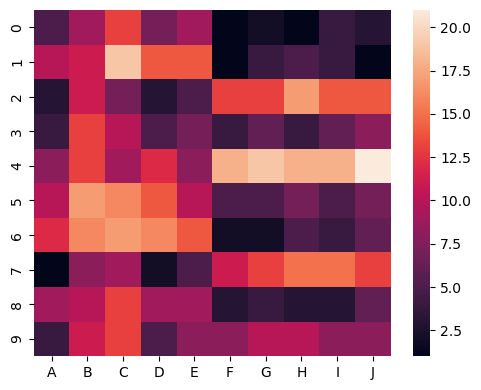

In [5]:
#plot data
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(df, 
                 ax=ax)
plt.tight_layout()
plt.show()

In [6]:
# Calculate the correlation between individuals. We have to transpose first, because the corr function calculate the pairwise correlations between columns.
corr = df.corr()
corr

,A,B,C,D,E,F,G,H,I,J
A,1.000000,0.659205,0.767847,0.970309,0.875718,-0.409401,-0.463247,-0.409927,-0.512735,-0.343715
B,0.659205,1.000000,0.391784,0.693911,0.464459,-0.089632,-0.184049,-0.097058,-0.216927,0.004608
C,0.767847,0.391784,1.000000,0.769892,0.931728,-0.746480,-0.731066,-0.654265,-0.762645,-0.771709
D,0.970309,0.693911,0.769892,1.000000,0.882718,-0.334237,-0.378437,-0.324734,-0.409123,-0.278764
E,0.875718,0.464459,0.931728,0.882718,1.000000,-0.634849,-0.634755,-0.566144,-0.650183,-0.618129
F,-0.409401,-0.089632,-0.746480,-0.334237,-0.634849,1.000000,0.983794,0.956846,0.965118,0.968962
G,-0.463247,-0.184049,-0.731066,-0.378437,-0.634755,0.983794,1.000000,0.945723,0.968478,0.935488
H,-0.409927,-0.097058,-0.654265,-0.324734,-0.566144,0.956846,0.945723,1.000000,0.956496,0.890720
I,-0.512735,-0.216927,-0.762645,-0.409123,-0.650183,0.965118,0.968478,0.956496,1.000000,0.932150
J,-0.343715,0.004608,-0.771709,-0.278764,-0.618129,0.968962,0.935488,0.890720,0.932150,1.000000


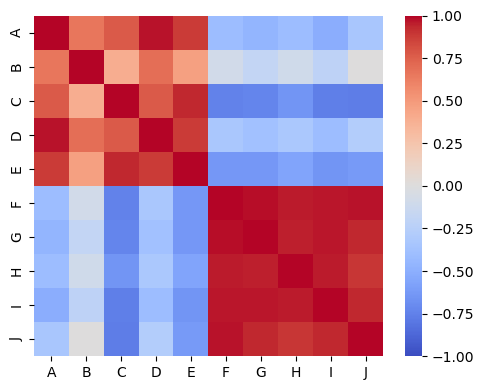

In [7]:
#plot correlation matrix
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(corr, vmin=-1, vmax=1, 
                 cmap="coolwarm", #colormap divergente
                 ax=ax)
plt.tight_layout()
plt.show()

In [8]:
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links

,var1,var2,value
0,A,A,1.000000
1,A,B,0.659205
2,A,C,0.767847
3,A,D,0.970309
4,A,E,0.875718
...,...,...,...
95,J,F,0.968962
96,J,G,0.935488
97,J,H,0.890720
98,J,I,0.932150


In [9]:
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.8) & (links['var1'] != links['var2']) ]
links_filtered

,var1,var2,value
3,A,D,0.970309
4,A,E,0.875718
24,C,E,0.931728
30,D,A,0.970309
34,D,E,0.882718
40,E,A,0.875718
42,E,C,0.931728
43,E,D,0.882718
56,F,G,0.983794
57,F,H,0.956846


In [10]:
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')

In [11]:
# Plot the network:
fig = plt.figure(figsize=(4, 4))
nx.draw(G, with_labels=True, 
        node_color='orange', 
        node_size=400, 
        edge_color='black', 
        linewidths=1, font_size=15)

In [12]:
# Custom colors:
fig = plt.figure(figsize=(4, 4))
nx.draw(G, with_labels=True, 
        node_color='skyblue', 
        edge_color='white')
fig.set_facecolor("#00000F")

### Esercizio 
In questo esercizio costruiamo la matrice di covarianza e poi il network partire da un set di dati finanziari (il prezzo delle azioni SP500, già utilizzato nel capitolo 11).

Procediamo come segue:
- importiamo i dati

In [13]:
sp500_sym = pd.read_csv("../data/sp500_sectors.csv") # simboli
sp500_px = pd.read_csv("../data/sp500_data.csv.gz", index_col=0) # dati di borsa

- a differenza del capitolo 11, non filtriamo i dati ma costruiamo direttamente la matrice di covrianza sul set completo sp500_px
-  procediamo poi come nell'esempio precedente, visualizziamo la matrice di covarianza e poi generiamo il network 
- studiamo come il network risultante dipenda dalla soglia utilizzata (nell'esempio precedente la soglia era 0.8, proviamo ad abbassarla)
- avendo molti punti possiamo decidere di eliminare le etichette sui nodi, per vedere meglio il grafico (with_label=False)
- come interpretiamo il grafo?


Costruisco la matrice di covarianza per l'intero dataset

In [15]:
sp500_sym

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH
...,...,...,...,...
512,health_care,Health Care,biotechnology,CELG
513,health_care,Health Care,biotechnology,GILD
514,health_care,Health Care,biotechnology,REGN
515,health_care,Health Care,biotechnology,VRTX


In [21]:
corr = sp500_px.corr()
corr

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
ADS,1.000000,0.123881,0.216321,0.138958,0.379913,0.160507,0.075650,0.244524,0.097446,0.144679,...,0.232642,0.354521,0.243054,0.014517,0.294062,0.314789,0.303196,0.285921,0.193290,0.310591
CA,0.123881,1.000000,0.332382,0.107467,0.168269,0.239873,0.245769,0.303925,0.207562,0.306990,...,0.155607,0.109660,0.189318,-0.003986,0.146262,0.132268,0.108358,0.094310,0.185303,0.167769
MSFT,0.216321,0.332382,1.000000,0.196069,0.267655,0.271875,0.320603,0.455894,0.225106,0.385592,...,0.221424,0.175035,0.346497,0.012031,0.197578,0.228443,0.195822,0.146832,0.213308,0.279060
RHT,0.138958,0.107467,0.196069,1.000000,0.195811,0.117652,0.156827,0.201953,0.053859,0.175878,...,0.130196,0.133666,0.172798,-0.003587,0.117277,0.138532,0.120633,0.124301,0.112931,0.134313
CTSH,0.379913,0.168269,0.267655,0.195811,1.000000,0.208166,0.133476,0.336702,0.131248,0.235099,...,0.296488,0.288128,0.244717,0.027443,0.256269,0.334366,0.269997,0.236905,0.199582,0.356092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CELG,0.314789,0.132268,0.228443,0.138532,0.334366,0.156807,0.113769,0.237477,0.095904,0.168272,...,0.267226,0.504247,0.453488,-0.007953,0.519566,1.000000,0.563648,0.477014,0.363717,0.361462
GILD,0.303196,0.108358,0.195822,0.120633,0.269997,0.139537,0.076164,0.197230,0.076326,0.134281,...,0.231097,0.489343,0.408733,0.017963,0.502783,0.563648,1.000000,0.464645,0.318713,0.323957
REGN,0.285921,0.094310,0.146832,0.124301,0.236905,0.114592,0.093828,0.153713,0.055010,0.134025,...,0.214079,0.528841,0.371174,0.030735,0.535553,0.477014,0.464645,1.000000,0.349472,0.250426
VRTX,0.193290,0.185303,0.213308,0.112931,0.199582,0.179768,0.285517,0.216135,0.073760,0.261434,...,0.320868,0.368057,0.390897,-0.009629,0.416448,0.363717,0.318713,0.349472,1.000000,0.250802


Faccio il plot (colormap) della matrice di covarianza

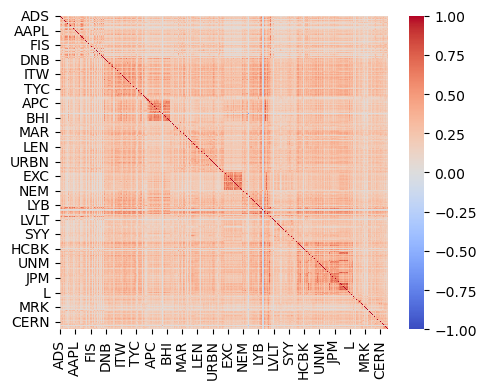

In [22]:
#plot correlation matrix
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(sp500_px.corr(), vmin=-1, vmax=1, 
                 cmap="coolwarm", #colormap divergente
                 ax=ax)

plt.tight_layout()
plt.show()

Creo la tabella con i link per il network

In [23]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links

,var1,var2,value
0,ADS,ADS,1.000000
1,ADS,CA,0.123881
2,ADS,MSFT,0.216321
3,ADS,RHT,0.138958
4,ADS,CTSH,0.379913
...,...,...,...
267284,HSIC,CELG,0.361462
267285,HSIC,GILD,0.323957
267286,HSIC,REGN,0.250426
267287,HSIC,VRTX,0.250802


creo il grafo

In [29]:
G=nx.from_pandas_edgelist(links, 'var1', 'var2')

Faccio il plot del network

In [35]:
# Plot the network:
fig = plt.figure(figsize=(12,12))
nx.draw(G, with_labels=True, 
        node_color='orange', 
        node_size=400, 
        edge_color='black', 
        linewidths=1, font_size=15)

In [36]:
# Custom colors:
fig = plt.figure(figsize=(4, 4))
nx.draw(G, with_labels=True, 
        node_color='skyblue', 
        edge_color='white')
fig.set_facecolor("#00000F")

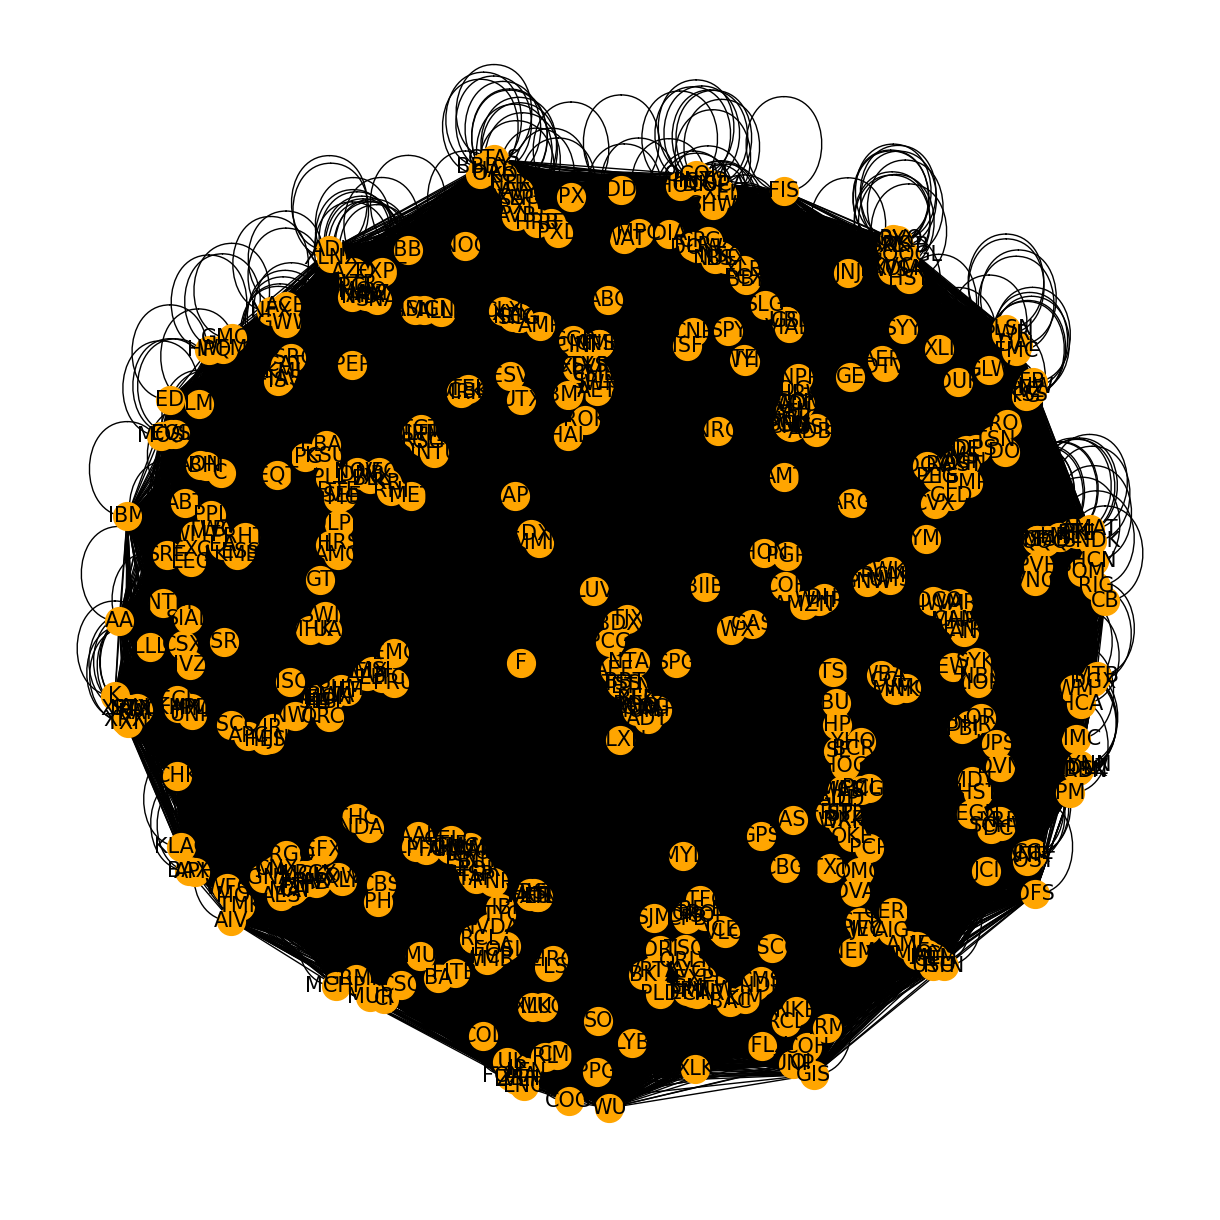

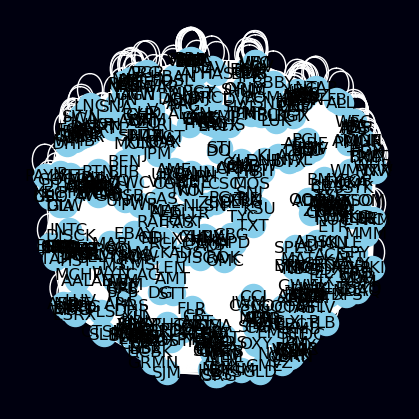

In [37]:
plt.show()

Dato che questi network sono illeggibili, utilizzo dei link e dei network ridotti. Utilizzo la stessa soglia utilizzata nell'esercizio precedente.

In [38]:
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.8) & (links['var1'] != links['var2']) ]
links_filtered

,var1,var2,value
75288,APA,XLE,0.812311
76839,COP,XLE,0.821257
77356,DVN,XLE,0.807014
85111,CVX,XLE,0.817272
163173,XLI,DIA,0.809722
163703,QQQ,XLK,0.878774
164207,SPY,DIA,0.919994
164721,DIA,XLI,0.809722
164723,DIA,SPY,0.919994
167136,XLE,APA,0.812311


In [39]:
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')

In [41]:
# Plot the network:
fig = plt.figure(figsize=(6,6))
nx.draw(G, with_labels=True, 
        node_color='orange', 
        node_size=400, 
        edge_color='black', 
        linewidths=1, font_size=15)

In [42]:
fig = plt.figure(figsize=(6,6))
nx.draw(G, with_labels=True, 
        node_color='skyblue', 
        edge_color='white')
fig.set_facecolor("#00000F")

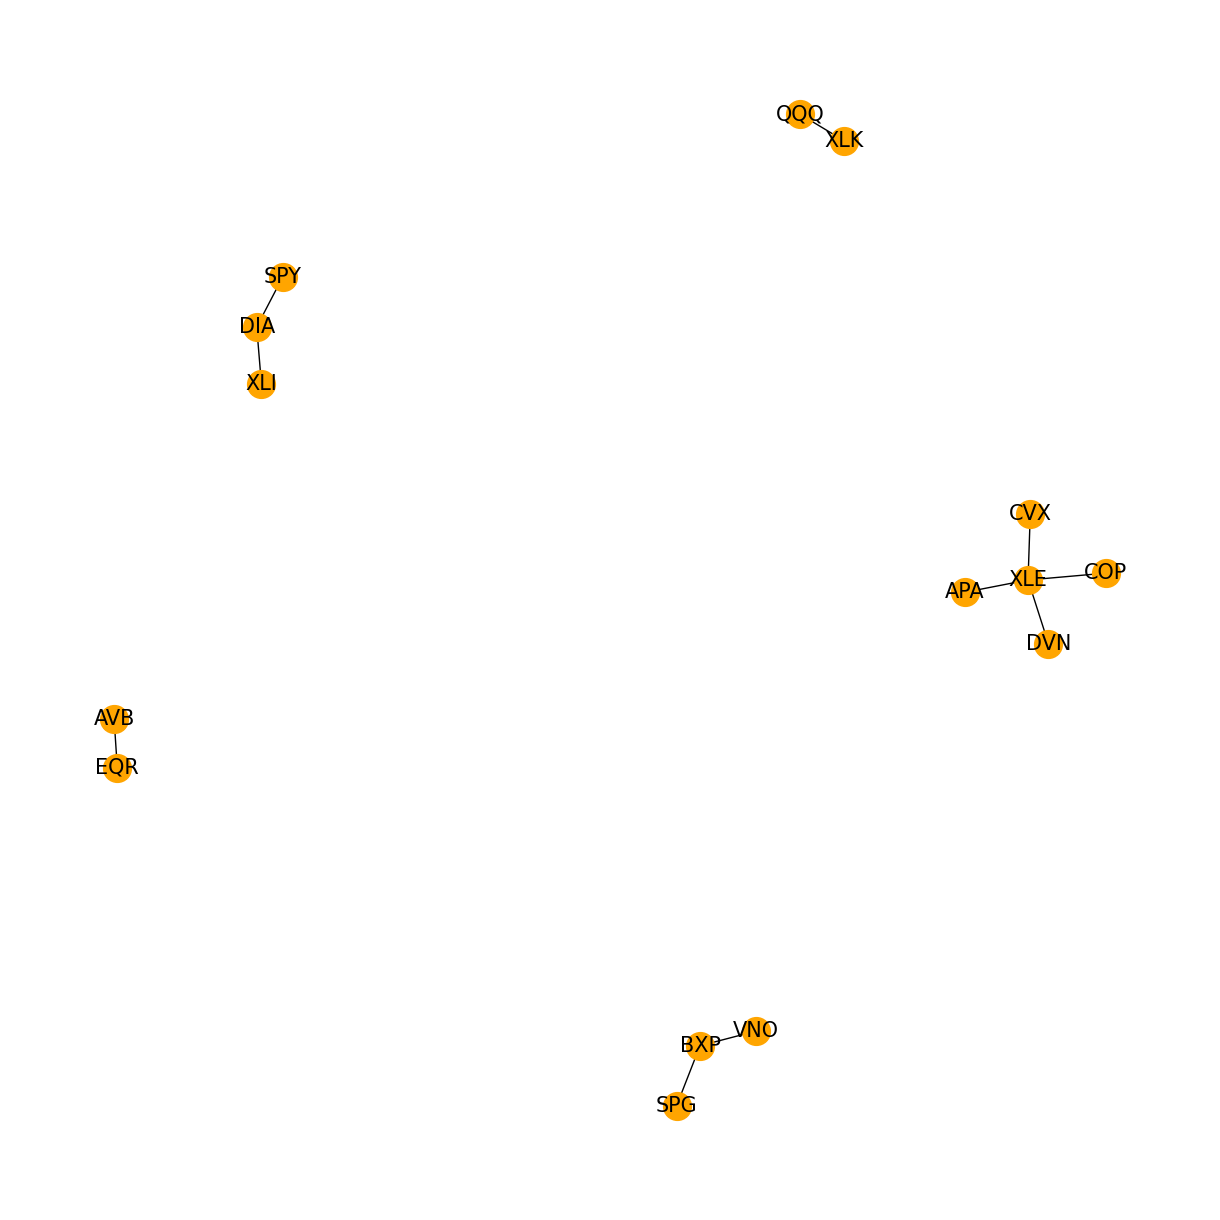

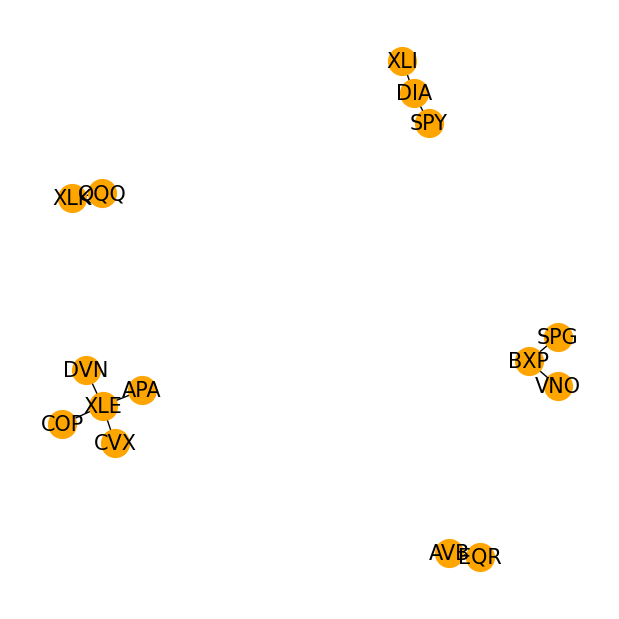

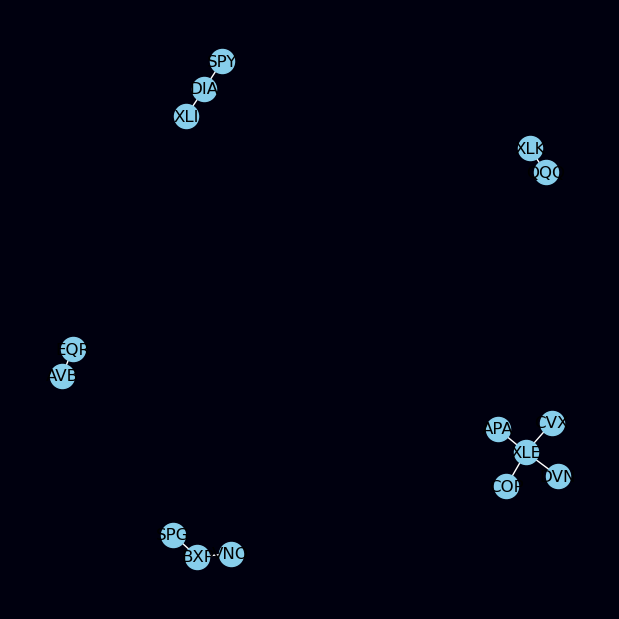

In [43]:
plt.show()

Come si vede dal link ridotto sono escluse molte correlazioni, probabilmente per via del valore di soglia che ho scelto. Provo quindi a variare il valore della soglia.

In [44]:
threshold = [0.8, 0.6, 0.5, 0.4, 0.3]

In [47]:
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered = []

for i in range(len(threshold)):
    links_filtered.append( links.loc[(links['value'] > threshold[i]) & (links['var1'] != links['var2'])] )

links_filtered

[       var1 var2     value
 75288   APA  XLE  0.812311
 76839   COP  XLE  0.821257
 77356   DVN  XLE  0.807014
 85111   CVX  XLE  0.817272
 163173  XLI  DIA  0.809722
 163703  QQQ  XLK  0.878774
 164207  SPY  DIA  0.919994
 164721  DIA  XLI  0.809722
 164723  DIA  SPY  0.919994
 167136  XLE  APA  0.812311
 167139  XLE  COP  0.821257
 167140  XLE  DVN  0.807014
 167155  XLE  CVX  0.817272
 171443  XLK  QQQ  0.878774
 219134  AVB  EQR  0.809749
 228448  BXP  SPG  0.802093
 228449  BXP  VNO  0.822328
 229454  EQR  AVB  0.809749
 233608  SPG  BXP  0.802093
 234125  VNO  BXP  0.822328,
         var1  var2     value
 1351    MSFT   SPY  0.616829
 1365    MSFT   XLK  0.627078
 3165     EMC  CSCO  0.600951
 3418     EMC   QQQ  0.672207
 3433     EMC   XLK  0.629729
 ...      ...   ...       ...
 243459    CI   AET  0.609847
 244493   UNH   AET  0.636181
 244497   UNH  ANTM  0.639372
 245010  ANTM   AET  0.636675
 245013  ANTM   UNH  0.639372
 
 [1596 rows x 3 columns],
         var1  var2    

In [48]:
G = []

for i in range(len(threshold)):
    G.append(nx.from_pandas_edgelist(links_filtered[i], 'var1', 'var2'))

In [57]:
colors = ['lawngreen', 'lightgreen', 'forestgreen', 'limegreen', 'darkgreen']

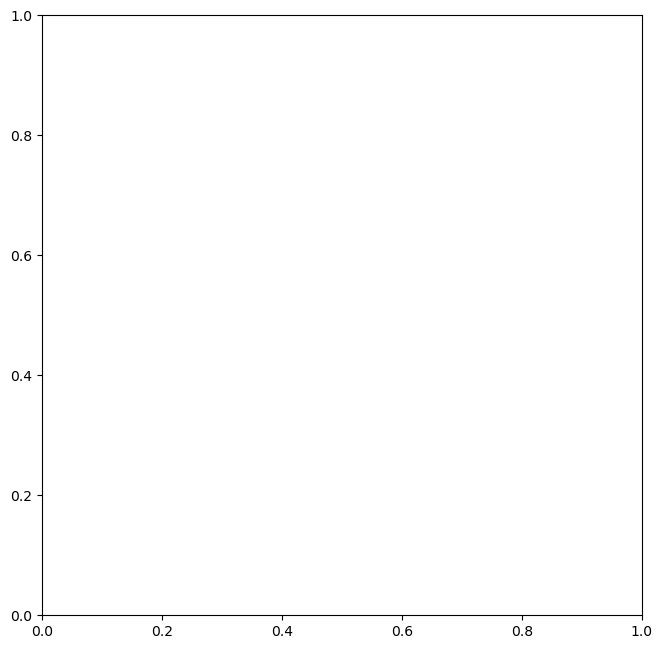

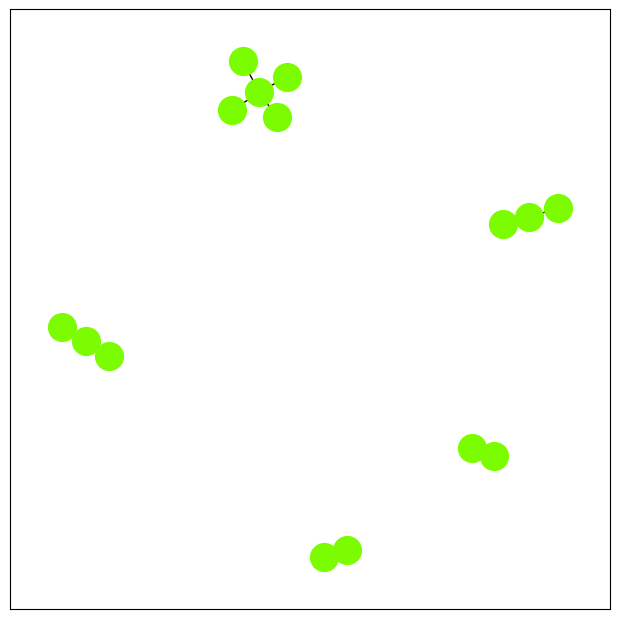

<Figure size 600x600 with 0 Axes>

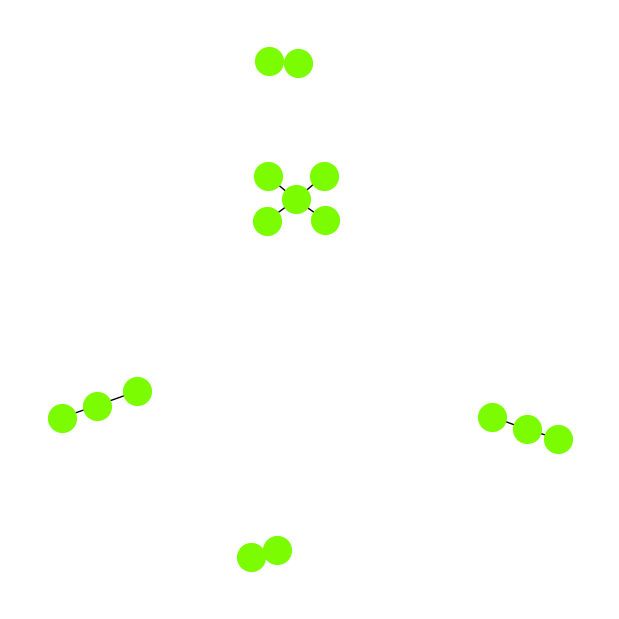

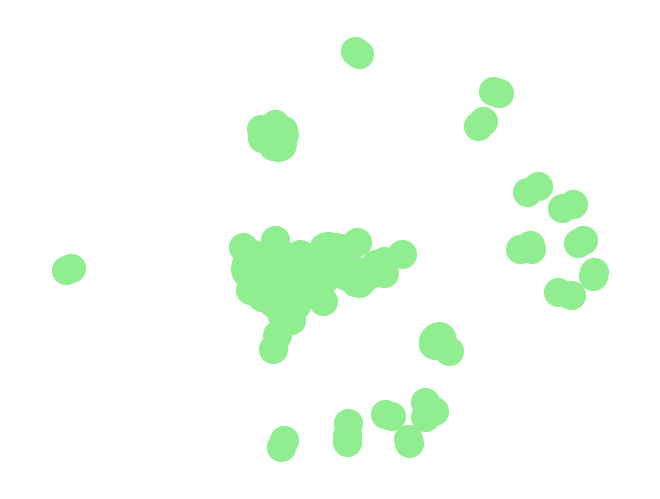

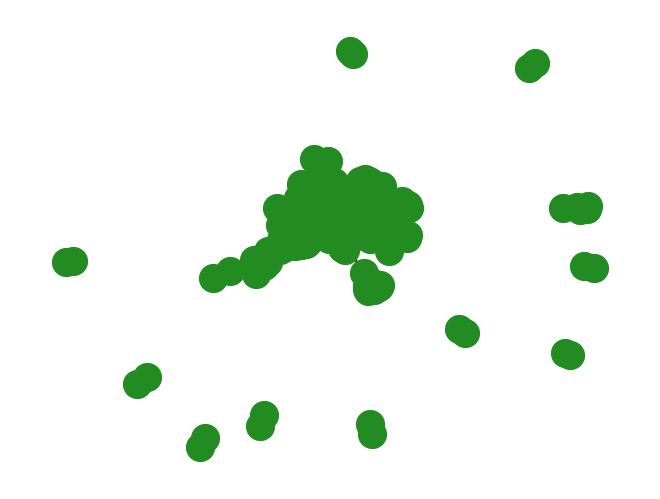

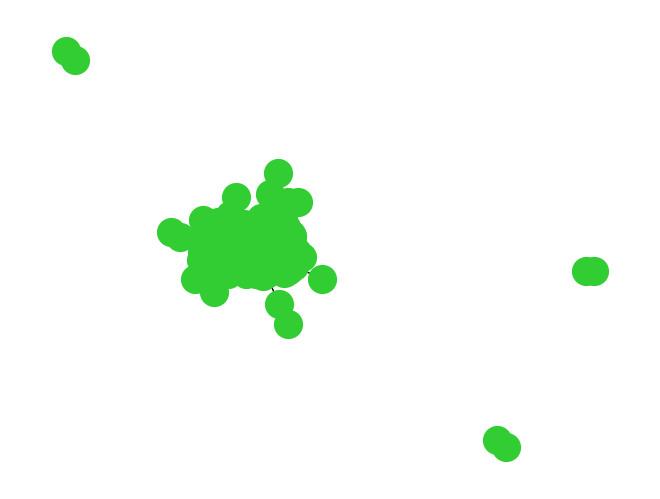

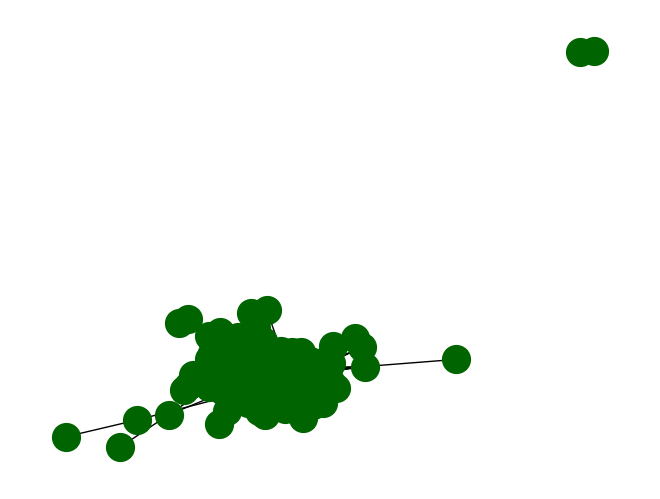

In [63]:
# Plot the network:
fig = plt.figure(figsize=(6,6))

for i in range(len(threshold)):
    nx.draw(G[i], with_labels=False, 
        node_color=colors[i], 
        node_size=400, 
        edge_color='black', 
        linewidths=1, font_size=15,
        labels = False)
    plt.show()

In [54]:
print(len(G))

5


In [55]:
print(G)

[<networkx.classes.graph.Graph object at 0x7f93815b2880>, <networkx.classes.graph.Graph object at 0x7f93815b27f0>, <networkx.classes.graph.Graph object at 0x7f93815c3df0>, <networkx.classes.graph.Graph object at 0x7f93815c7220>, <networkx.classes.graph.Graph object at 0x7f93815a7190>]


Provo ad abbassare ulteriormente la soglia

In [73]:
threshold = 0.3
links_filtered=links.loc[(links['value'] > threshold) & (links['var1'] != links['var2'])]

In [74]:
links_filtered

,var1,var2,value
4,ADS,CTSH,0.379913
11,ADS,AVGO,0.305917
30,ADS,TEL,0.344033
31,ADS,HRS,0.307980
33,ADS,ACN,0.330956
...,...,...,...
267279,HSIC,WAT,0.317344
267281,HSIC,AMGN,0.302670
267283,HSIC,BIIB,0.301783
267284,HSIC,CELG,0.361462


In [75]:
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')

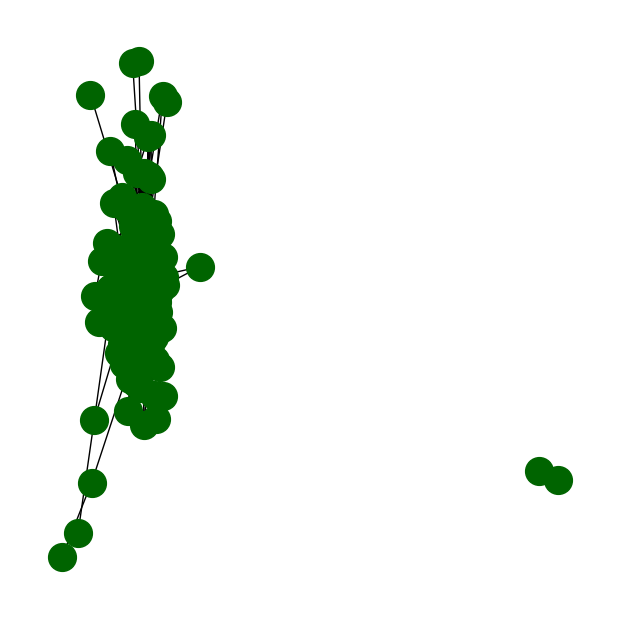

In [77]:
fig = plt.figure(figsize=(6,6))

nx.draw(G, with_labels=False, 
        node_color=colors[i], 
        node_size=400, 
        edge_color='black', 
        linewidths=1, font_size=15,
        labels = False)
plt.show()

Eventualmente potrebbe essere interessante variare la dimensione dei nodi del grafo per poterlo visualizzare meglio.